# Exploratory Data Analysis of ATM Cash Flow Prediction Data Set
Dataset Link - [Drive(Add drive link here)](https://)

## Preparations

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline

plt.style.use('bmh')

In [10]:
df = pd.read_csv('/content/aggregated_atm_data.csv')
df.head()

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence
0,Big Street ATM,1/1/2011,50,20,30,123800,41700,82100,Saturday,H,H,WHH
1,Mount Road ATM,1/1/2011,253,67,186,767900,270900,497000,Saturday,C,H,WHH
2,Airport ATM,1/1/2011,98,56,42,503400,347700,155700,Saturday,C,H,WHH
3,KK Nagar ATM,1/1/2011,265,159,106,945300,532600,412700,Saturday,C,H,WHH
4,Christ College ATM,1/1/2011,74,25,49,287700,148200,139500,Saturday,C,H,WHH


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11589 entries, 0 to 11588
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ATM Name                      11589 non-null  object
 1   Transaction Date              11589 non-null  object
 2   No Of Withdrawals             11589 non-null  int64 
 3   No Of XYZ Card Withdrawals    11589 non-null  int64 
 4   No Of Other Card Withdrawals  11589 non-null  int64 
 5   Total amount Withdrawn        11589 non-null  int64 
 6   Amount withdrawn XYZ Card     11589 non-null  int64 
 7   Amount withdrawn Other Card   11589 non-null  int64 
 8   Weekday                       11589 non-null  object
 9   Festival Religion             11589 non-null  object
 10  Working Day                   11589 non-null  object
 11  Holiday Sequence              11589 non-null  object
dtypes: int64(6), object(6)
memory usage: 1.1+ MB


From this we can see that no data is missing, i.e. there are no null values

## Looking at individual columns

### ATM Name

In [12]:
df['ATM Name'].unique()

array(['Big Street ATM', 'Mount Road ATM', 'Airport ATM', 'KK Nagar ATM',
       'Christ College ATM'], dtype=object)

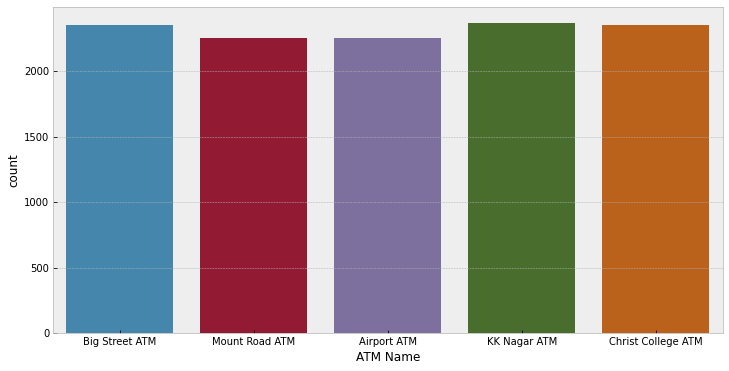

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(x='ATM Name', data = df)

We've data of 5 ATMs.
- Big Street ATM
- Mount Road ATM
- Airport Road ATM
- KK Nagar ATM
- Christ College ATM

### Transaction Date

In [14]:
df['Transaction Date'][0]

'1/1/2011'

In [15]:
df['Transaction Date'][len(df)-1]

'29-09-2017'

We've ATM Withdrawal Data from 1st January 2011 to 29th Sept 2017

In [16]:
df.head(90)

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence
0,Big Street ATM,1/1/2011,50,20,30,123800,41700,82100,Saturday,H,H,WHH
1,Mount Road ATM,1/1/2011,253,67,186,767900,270900,497000,Saturday,C,H,WHH
2,Airport ATM,1/1/2011,98,56,42,503400,347700,155700,Saturday,C,H,WHH
3,KK Nagar ATM,1/1/2011,265,159,106,945300,532600,412700,Saturday,C,H,WHH
4,Christ College ATM,1/1/2011,74,25,49,287700,148200,139500,Saturday,C,H,WHH
...,...,...,...,...,...,...,...,...,...,...,...,...
85,Big Street ATM,18-01-2011,29,13,16,163600,73400,90200,Tuesday,NH,W,HWW
86,Mount Road ATM,18-01-2011,123,82,41,405200,360600,44600,Tuesday,NH,W,HWW
87,Airport ATM,18-01-2011,86,65,21,343100,273100,70000,Tuesday,NH,W,HWW
88,KK Nagar ATM,18-01-2011,225,159,66,831200,663600,167600,Tuesday,NH,W,HWW


As visible in the above cell, the *Transaction Date* column has dates in 2 formats, slash format and dash format. This will have to be fixed

###No Of Withdrawals

In [39]:
print(f'Miniumum Transaction Count => {df["No Of Withdrawals"].min()}')
print(f'Miniumum Transaction Count => {df["No Of Withdrawals"].max()}')

Miniumum Transaction Count => 1
Miniumum Transaction Count => 491


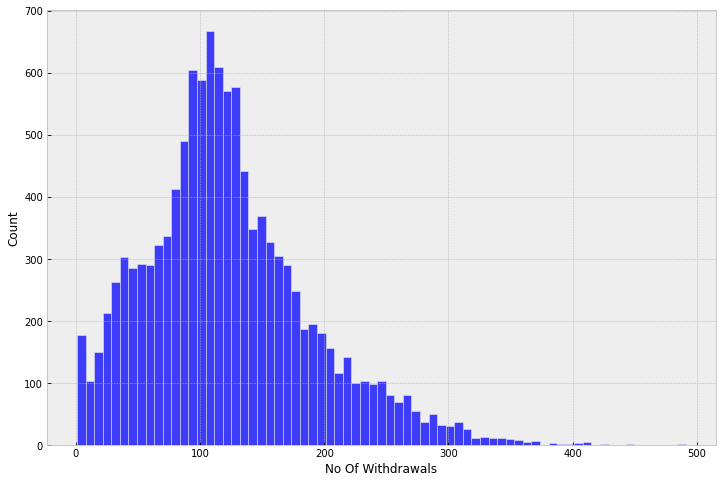

In [37]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x='No Of Withdrawals')

On most days the transaction count between 100 and 150

This column contains the count of the transactions that happened in a day. Minimum is 1 and Maximum is 491.

Similarly, *No Of XYZ Card Withdrawals* consists of count of transactions which were made using cards of this bank(XYZ) and *No Of Other Card Withdrawals* consists of transactions which were made using cards of other banks 

### Total amount Withdrawn

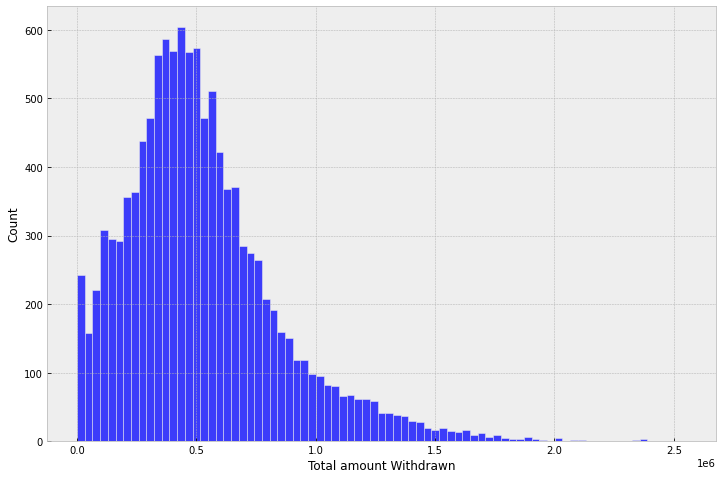

In [33]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x='Total amount Withdrawn')

From the above graph, we can see most of the withdrawals lie in the 3 Lakh to 6 Lakh Range

### Weekday


In [20]:
df['Weekday'].value_counts()

SUNDAY       2177
SATURDAY     1131
TUESDAY       989
WEDNESDAY     947
MONDAY        945
THURSDAY      903
FRIDAY        902
Saturday      518
Thursday      517
Wednesday     515
Monday        513
Tuesday       513
Friday        510
Sunday        509
Name: Weekday, dtype: int64

As visible in the previous cell, the weekday has titled case and upper case strings, this will have to be fixed to one format

### Festival Religion

In [21]:
df['Festival Religion'].value_counts()

NH    10727
H       367
N       198
M       178
C       119
Name: Festival Religion, dtype: int64

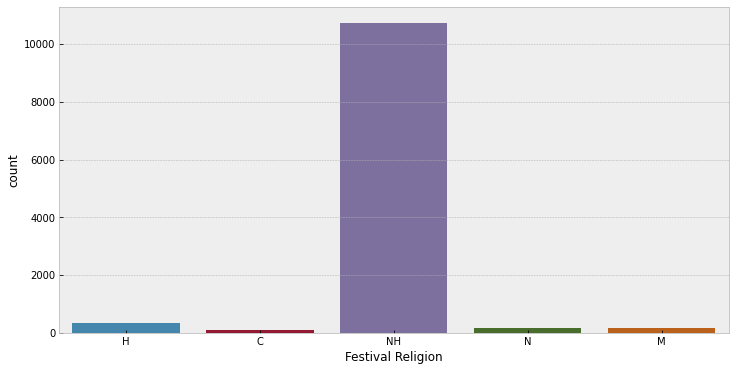

In [40]:
plt.figure(figsize=(12,6))
sns.countplot(x='Festival Religion', data = df)

Here, 
* *NH* - No Holiday. Because of the count
* *H* - Hindu
* *N* - National
* *M* - Muslim
* *C* - Christian

### Working Day

In [22]:
df['Working Day'].value_counts()

W    6621
H    4968
Name: Working Day, dtype: int64

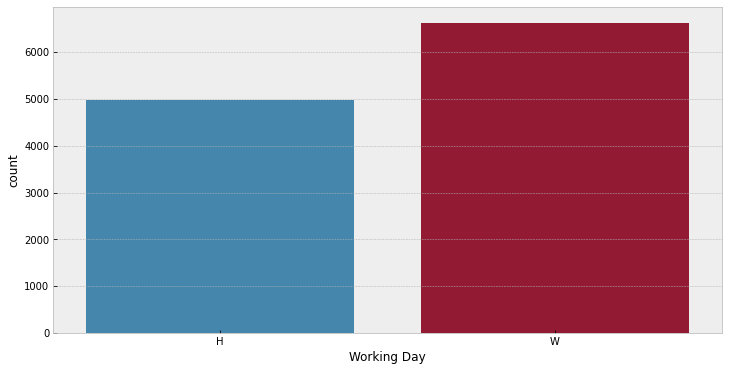

In [41]:
plt.figure(figsize=(12,6))
sns.countplot(x='Working Day', data = df)

Here, 
* *W* - Working 
* *H* - Holiday

### Holiday Sequence

In [23]:
df['Holiday Sequence'].value_counts()

WWW    3621
HHW    2763
WHH    1678
HWW    1447
WWH    1408
WHW     284
HHH     253
HWH     135
Name: Holiday Sequence, dtype: int64

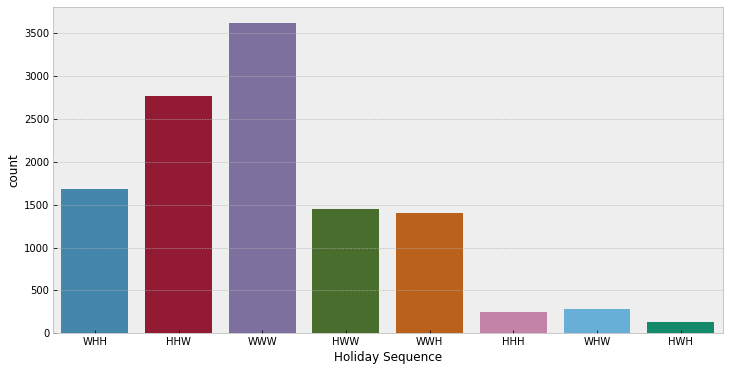

In [42]:
plt.figure(figsize=(12,6))
sns.countplot(x='Holiday Sequence', data = df)

This is the holiday sequence
Here, the format being followed is (W/H Status of day before)(W/H Status of that day)(W/H Status of the next day)

E.g. If yesterday was a holiday (H), today is a working day (W), and tomorrow is a holiday (H) again, then the *Holiday Sequence* would be *HWH*

## Relationships between columns

### Relationship between Weekday and Withdrawal

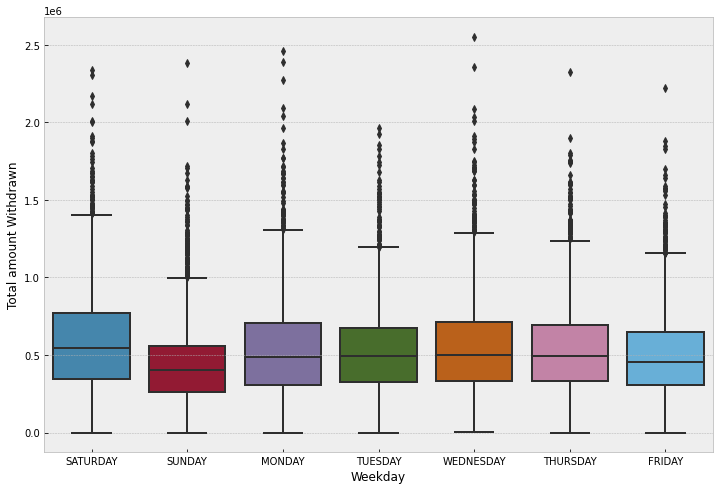

In [24]:
plt.figure(figsize=(12,8))
df['Weekday'] = df['Weekday'].str.upper()
sns.boxplot(x='Weekday', y='Total amount Withdrawn', data=df)

The spikes in the plot shows that they are outliers to the data set at several instances

### Relationship between Month and Withdrawal

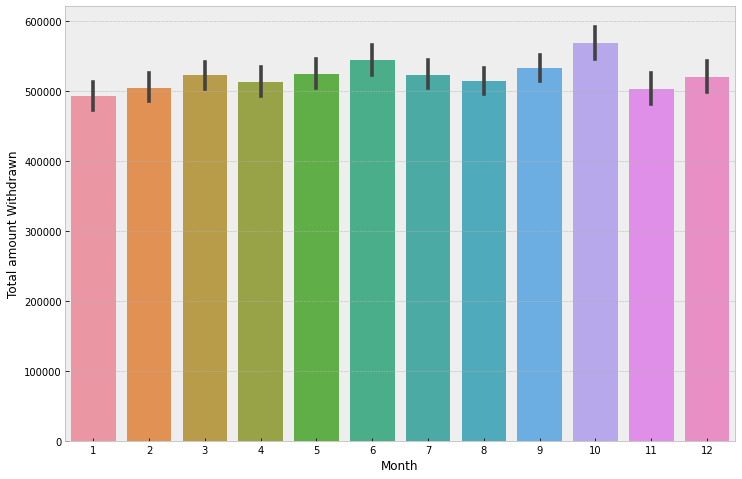

In [27]:
plt.figure(figsize=(12,8))
df['Month'] = df['Transaction Date'].dt.month
sns.barplot(x='Month', y='Total amount Withdrawn', data=df)

Almost all months have similar withdrawals, with October leading with a small margin

### Relationship between Holiday Sequence and Withdrawal

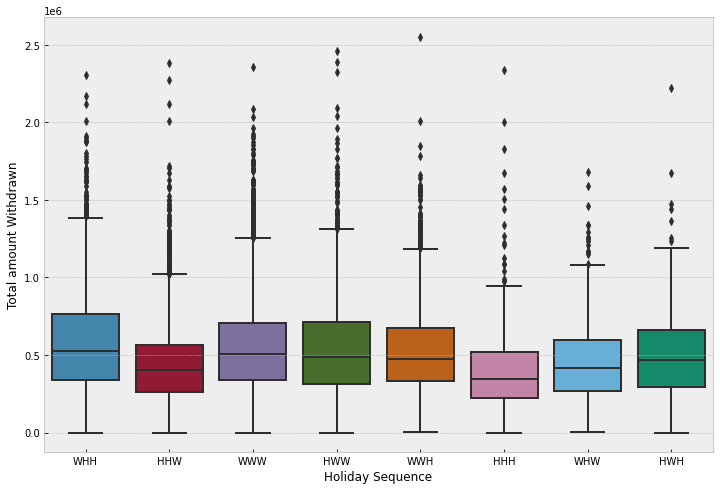

In [29]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Holiday Sequence', y='Total amount Withdrawn', data=df)

There is a small increase in withdrawal, when the sequence is `WHH` i.e. Previous day was a working day, that day was a holiday and the next day was a holiday

### Relationship between Number of Withdrawals and Withdrawal

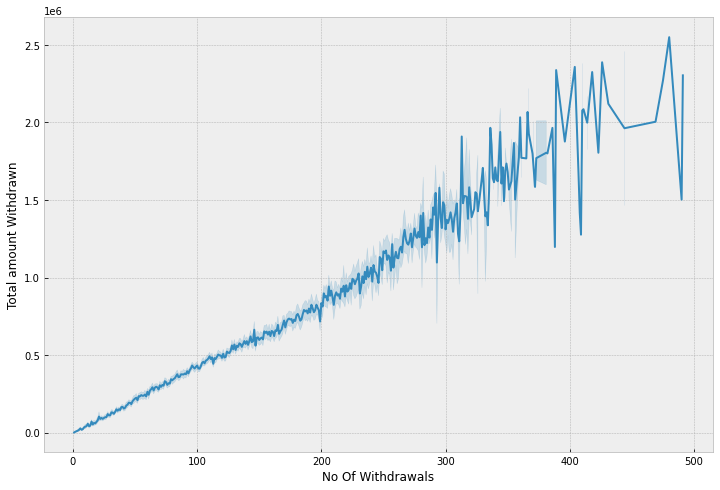

In [31]:
plt.figure(figsize=(12,8))
sns.lineplot(x='No Of Withdrawals', y='Total amount Withdrawn', data=df)

We can see an overall rise in withdrawal as the number of withdrawal increases.


### Relationship between Date and Withdrawal (Timeseries Plot)

In [19]:
def dateformat_fixer(date):
    # If its part of the first format, convert it to the second one
    if '/' in date:
        date_parts = date.split('/')
        
        year = date_parts[2]
        month = date_parts[1]
        day = date_parts[0]
        
        if int(month) < 10:
            month = '0' + month
        if int(day) < 10:
            day = '0' + day
        
        return day + '-' + month + '-' + year
    # If its already in second format, keep it as it is
    else:
        return date

df['Transaction Date'] = df.apply(lambda row: dateformat_fixer(row['Transaction Date']), axis=1)
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], format='%d-%m-%Y')


fig = px.line(df, x='Transaction Date', y='Total amount Withdrawn', 
                      labels={'x':'Date', 'y':'Amount Withdrawn'}, title='Total Amount Withdrawn Distribution')
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()